In [1]:
import pandas as pd
import numpy as np

from datetime import datetime
import pandas as pd 

from scipy import optimize
from scipy import integrate

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns


sns.set(style="darkgrid")

mpl.rcParams['figure.figsize'] = (16, 9)
pd.set_option('display.max_rows', 500)

In [2]:
import os
os.getcwd()

'C:\\Users\\Pramod\\Downloads\\eds\\notebooks'

In [3]:
df_analyse=pd.read_csv('../data/processed/COVID_small_table_confirmed.csv',sep=';')  
df_analyse.sort_values('date',ascending=True).head()

,date,Germany,India,US,Brazil,United Kingdom
0,2020-01-22,0,0,1,0,0
1,2020-01-23,0,0,1,0,0
2,2020-01-24,0,0,2,0,0
3,2020-01-25,0,0,2,0,0
4,2020-01-26,0,0,5,0,0


In [4]:
# set some basic parameters
# beta/gamma is denoted as  'basic reproduction number'

N0=1000000 #max susceptible population
beta=0.4   # infection spread dynamics
gamma=0.1  # recovery rate


# condition I0+S0+R0=N0
I0=df_analyse.India[35]
S0=N0-I0
R0=0

In [5]:
def SIR_model(SIR,beta,gamma):
    ''' Simple SIR model
        S: susceptible population
        I: infected people
        R: recovered people
        beta: 
        
        overall condition is that the sum of changes (differnces) sum up to 0
        dS+dI+dR=0
        S+I+R= N (constant size of population)
    
    '''
    
    S,I,R=SIR
    dS_dt=-beta*S*I/N0          #S*I is the 
    dI_dt=beta*S*I/N0-gamma*I
    dR_dt=gamma*I
    return([dS_dt,dI_dt,dR_dt])

In [30]:
SIR=np.array([S0,I0,R0])
propagation_rates=pd.DataFrame(columns={'susceptible':S0,
                                        'infected':I0,
                                        'recoverd':R0})



for each_t in np.arange(100):
   
    new_delta_vec=SIR_model(SIR,beta,gamma)
   
    SIR=SIR+new_delta_vec
    propagation_rates=propagation_rates.append({'susceptible':SIR[0],
                                                'infected':SIR[1],
                                                'recovered':SIR[2]}, ignore_index=True)

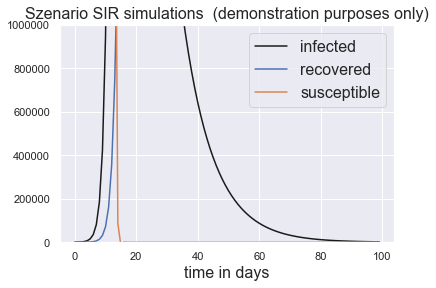

In [31]:
fig, ax1 = plt.subplots(1, 1)

ax1.plot(propagation_rates.index,propagation_rates.infected,label='infected',color='k')
ax1.plot(propagation_rates.index,propagation_rates.recovered,label='recovered')
ax1.plot(propagation_rates.index,propagation_rates.susceptible,label='susceptible')

ax1.set_ylim(10, 1000000)
ax1.set_yscale('linear')
ax1.set_title('Szenario SIR simulations  (demonstration purposes only)',size=16)
ax1.set_xlabel('time in days',size=16)
ax1.legend(loc='best',
           prop={'size': 16});

## Fitting the parameters of SIR model

In [10]:
# set some basic parameters
# beta/gamma is denoted as  'basic reproduction number'

N0=10000000 #max susceptible population
beta=1.4   # infection spread dynamics
gamma=10.5  # recovery rate


# condition I0+S0+R0=N0
I0=df_analyse.India[52]
S0=N0-I0
R0=0

In [11]:
ydata = np.array(df_analyse.India[52:])
t=np.arange(0, len(ydata))
t

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152])

In [12]:
ydata

array([    102,     113,     119,     142,     156,     194,     244,
           330,     396,     499,     536,     657,     727,     887,
           987,    1024,    1251,    1397,    1998,    2543,    2567,
          3082,    3588,    4778,    5311,    5916,    6725,    7598,
          8446,    9205,   10453,   11487,   12322,   13430,   14352,
         15722,   17615,   18539,   20080,   21370,   23077,   24530,
         26283,   27890,   29451,   31324,   33062,   34863,   37257,
         39699,   42505,   46437,   49400,   52987,   56351,   59695,
         62808,   67161,   70768,   74292,   78055,   81997,   85784,
         90648,   95698,  100328,  106475,  112028,  118226,  124794,
        131423,  138536,  144950,  150793,  158086,  165386,  173491,
        181827,  190609,  198370,  207191,  216824,  226713,  236184,
        246622,  257486,  265928,  276146,  286605,  297535,  308993,
        320922,  332424,  343091,  354065,  366946,  380532,  395048,
        410451,  425

In [13]:
# ensure re-initialization 
I0=ydata[0]
S0=N0-I0
R0=0
beta

1.4

In [14]:
def SIR_model_t(SIR,t,beta,gamma):
    ''' Simple SIR model
        S: susceptible population
        t: time step, mandatory for integral.odeint
        I: infected people
        R: recovered people
        beta: 
        
        overall condition is that the sum of changes (differnces) sum up to 0
        dS+dI+dR=0
        S+I+R= N (constant size of population)
    
    '''
    
    S,I,R=SIR
    dS_dt=-beta*S*I/N0          #S*I is the 
    dI_dt=beta*S*I/N0-gamma*I
    dR_dt=gamma*I
    return dS_dt,dI_dt,dR_dt

In [15]:
def fit_odeint(x, beta, gamma):
    '''
    helper function for the integration
    '''
    return integrate.odeint(SIR_model_t, (S0, I0, R0), x, args=(beta, gamma))[:,1] # we only would like to get dI


In [16]:
# example curve of our differential equationa
# popt=[1.75,0.675]
popt=[0.75,2.9]
fit_odeint(t, *popt)

array([ 1.02000000e+02,  1.18812745e+01,  1.38396614e+00,  1.61208469e-01,
        1.87780420e-02,  2.18732238e-03,  2.54785023e-04,  2.96788772e-05,
        3.45683076e-06,  4.02970296e-07,  4.64315365e-08,  5.60180993e-09,
        7.01464178e-10, -3.60636618e-10, -3.31990492e-10, -2.71518603e-10,
       -1.12791139e-10, -3.82615883e-11, -3.58533055e-11, -3.34450227e-11,
       -3.10367399e-11, -2.86284571e-11, -2.62201743e-11, -2.38118915e-11,
       -2.14036086e-11, -1.89953258e-11, -1.65870430e-11, -1.41787602e-11,
       -1.17704774e-11, -9.36219461e-12, -6.95391181e-12, -4.54562900e-12,
       -2.13734619e-12, -1.07966383e-12, -1.00961359e-12, -9.39563339e-13,
       -8.69513092e-13, -7.99462844e-13, -7.29412596e-13, -6.59362349e-13,
       -5.89312101e-13, -5.19261854e-13, -4.49211606e-13, -3.79161359e-13,
       -3.09111111e-13, -2.39060864e-13, -1.69010616e-13, -9.89603686e-14,
       -3.25703831e-14, -3.23611491e-14, -3.21519152e-14, -3.19426813e-14,
       -3.17334474e-14, -

In [17]:

# the resulting curve has to be fitted
# free parameters are here beta and gamma

In [29]:

popt, pcov = optimize.curve_fit(fit_odeint, t, ydata, maxfev = 4000)
perr = np.sqrt(np.diag(pcov))
    
print('standard deviation errors : ',str(perr), ' start infect:',ydata[0])
print("Optimal parameters: beta =", popt[0], " and gamma = ", popt[1])

D:\anaconda\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: overflow encountered in double_scalars
  app.launch_new_instance()
D:\anaconda\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: overflow encountered in double_scalars
D:\anaconda\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: overflow encountered in double_scalars


standard deviation errors :  [0.00165187 0.00141708]  start infect: 102
Optimal parameters: beta = 0.13295011703063292  and gamma =  0.05563220529416131


In [26]:
# get the final fitted curve
# popt = [0.35, 0.4]
# popt = popt.tolist()
fitted=fit_odeint(t, *popt)

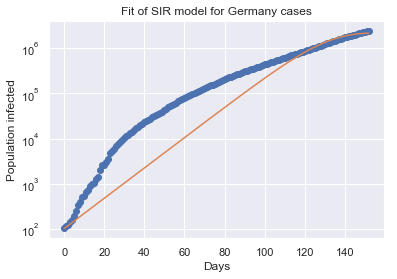

Optimal parameters: beta = 0.13295011703063292  and gamma =  0.05563220529416131
Basic Reproduction Number R0  2.3898049039696483
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


In [27]:
plt.semilogy(t, ydata, 'o')
plt.semilogy(t, fitted)
plt.title("Fit of SIR model for Germany cases")
plt.ylabel("Population infected")
plt.xlabel("Days")
plt.show()
print("Optimal parameters: beta =", popt[0], " and gamma = ", popt[1])
print("Basic Reproduction Number R0 " , popt[0]/ popt[1])
print("This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki")

## Dynamic beta in SIR (infection rate)

In [21]:
t_initial=14
t_intro_measures=21
t_hold=72
t_relax=48

beta_max=  0.4  # 0.325
beta_min=0.11
gamma=0.095 # 0.045
pd_beta=np.concatenate((np.array(t_initial*[beta_max]),
                       np.linspace(beta_max,beta_min,t_intro_measures),
                       np.array(t_hold*[beta_min]),
                        np.linspace(beta_min,beta_max,t_relax),
                       ))

In [22]:
pd_beta

array([0.4       , 0.4       , 0.4       , 0.4       , 0.4       ,
       0.4       , 0.4       , 0.4       , 0.4       , 0.4       ,
       0.4       , 0.4       , 0.4       , 0.4       , 0.4       ,
       0.3855    , 0.371     , 0.3565    , 0.342     , 0.3275    ,
       0.313     , 0.2985    , 0.284     , 0.2695    , 0.255     ,
       0.2405    , 0.226     , 0.2115    , 0.197     , 0.1825    ,
       0.168     , 0.1535    , 0.139     , 0.1245    , 0.11      ,
       0.11      , 0.11      , 0.11      , 0.11      , 0.11      ,
       0.11      , 0.11      , 0.11      , 0.11      , 0.11      ,
       0.11      , 0.11      , 0.11      , 0.11      , 0.11      ,
       0.11      , 0.11      , 0.11      , 0.11      , 0.11      ,
       0.11      , 0.11      , 0.11      , 0.11      , 0.11      ,
       0.11      , 0.11      , 0.11      , 0.11      , 0.11      ,
       0.11      , 0.11      , 0.11      , 0.11      , 0.11      ,
       0.11      , 0.11      , 0.11      , 0.11      , 0.11   

In [23]:
SIR=np.array([S0,I0,R0])
propagation_rates=pd.DataFrame(columns={'susceptible':S0,
                                        'infected':I0,
                                        'recoverd':R0})



for each_beta in pd_beta:
   
    new_delta_vec=SIR_model(SIR,each_beta,gamma)
   
    SIR=SIR+new_delta_vec
    
    propagation_rates=propagation_rates.append({'susceptible':SIR[0],
                                                'infected':SIR[1],
                                                'recovered':SIR[2]}, ignore_index=True)

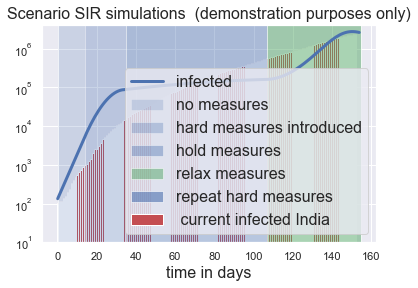

In [24]:
fig, ax1 = plt.subplots(1, 1)

ax1.plot(propagation_rates.index,propagation_rates.infected,label='infected',linewidth=3)

t_phases=np.array([t_initial,t_intro_measures,t_hold,t_relax]).cumsum()
ax1.bar(np.arange(len(ydata)),ydata, width=0.8,label=' current infected India',color='r')
ax1.axvspan(0,t_phases[0], facecolor='b', alpha=0.2,label='no measures')
ax1.axvspan(t_phases[0],t_phases[1], facecolor='b', alpha=0.3,label='hard measures introduced')
ax1.axvspan(t_phases[1],t_phases[2], facecolor='b', alpha=0.4,label='hold measures')
ax1.axvspan(t_phases[2],t_phases[3], facecolor='g', alpha=0.5,label='relax measures')
ax1.axvspan(t_phases[3],len(propagation_rates.infected), facecolor='b', alpha=0.6,label='repeat hard measures')

ax1.set_ylim(10, 1.5*max(propagation_rates.infected))
ax1.set_yscale('log')
ax1.set_title('Scenario SIR simulations  (demonstration purposes only)',size=16)
ax1.set_xlabel('time in days',size=16)
ax1.legend(loc='best',
           prop={'size': 16});